# Intuitive Introduction to KL Divergence
---

***Outline:***
1. Introduction
2. Mathematics of KL Divergence
3. Visualising the KL Divergence with Varying Mean Values
4. Visualising the KL Divergence in Mulitple Parameter Dimensions
5. Additional Information

### Introduction

In general probability distributions are a concept that are introduced early in school, eventhough sometimes hidden and not specifically metnioned as such. Very often probabilities are introduced with rolling a dice or flipping a coin. In this case the probability distribution is uniform, i.e. all outcomes are equally likely.<br>

$$
p_{dice} = \frac{1}{6}
$$

$$
p_{coin} = \frac{1}{2}
$$

These probability distributions are maybe the most obvious ones that one encounters. They can be categorized into the group of uniform and discrete distributions, usually denoted with $\mathcal{U}$.<br>

These very simple distributions trivially fulfill the following properties that are better known as the axioms of probability theory:<br>

$$
\begin{align*}
p(x) &\geq 0 \\
\sum_{x} p(x) &= 1\\
p(\bigcup_{i=1}^{\infty} A_i) &= \sum_{i=1}^{\infty} p(A_i)
\end{align*}
$$

The ***first*** property states that the probability of an event is always greater or equal to zero. This is a very intuitive property, e.g., rolling a fair dice one knows that every outcome can happen.<br>

The ***second*** property states that the sum of all probabilities is equal to one. This is also a very intuitive property, e.g., rolling a fair dice one knows that the probability of rolling one of the possibilies is one. <br>

The ***third*** property looks very intimidating but can be understood easily. It states that the total probability of all possible events is equal to the sum of the probabilities of the individual events. E.g., rolling a fair dice one knows that the probability of rolling a 1 or a 2 is equal to the probability of rolling a 1 plus the probability of rolling a 2.<br>

After introducing the basic concepts, let me open up your eyes and tell you that probability distributions are everywhere. Let me give you some examples:<br>

- The weather forecast is a probability distribution over the weather conditions for the next day. The ***butterfly*** effect actually describes the many parameters that influence the weather forecast. It is not possible to determintically say what the weather will be like tomorrow. However, it is possible to give the weather forecast as a probability distribution. <br>

<p align="center">
<img src="images/weather_KL_divergence.png"  width="256" height="256">
</p>

- The size, intelligence, hair color, eye color, etc. of people around the world are all described by multiple probability distribution. Some of them are discrete others are continuous. 
- The stock market is a probability distribution over the price of a stock. The price of a stock is not deterministic, i.e. it is not possible to say what the price of a stock will be tomorrow. However, it is possible to give the probability distribution over the price of a stock. <br>

Some distributions are shown below:<br>

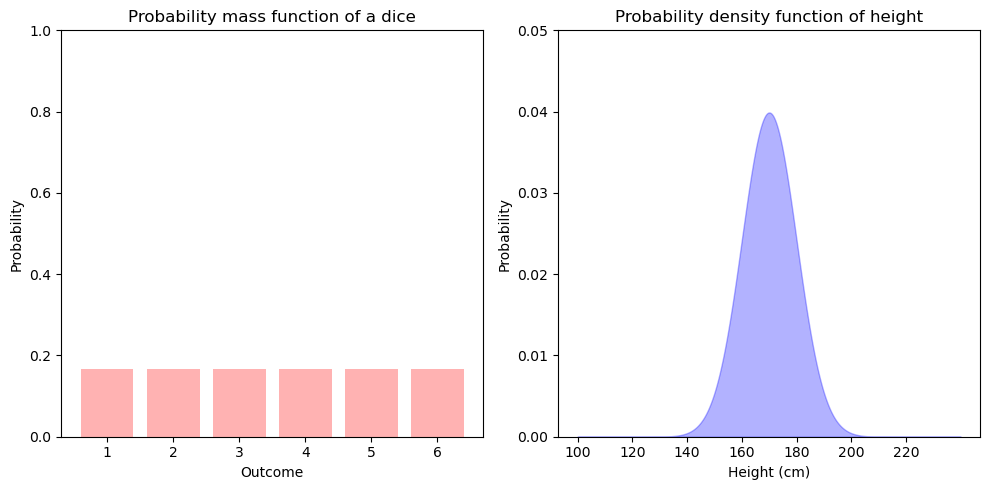

In [11]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axes = plt.subplots(figsize=(10, 5),
                          ncols=2, 
                          nrows=1)

# discrete distribution: rolling a dice
# probability of each outcome is equal
outcomes = np.arange(1, 7)
probabilityies = np.ones(6) / 6

# plot the probability mass function
axes[0].bar(outcomes, probabilityies, color='red', alpha=0.3)
axes[0].set_title('Probability mass function of a dice')

# set labels
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Probability')

# set ticks
axes[0].set_xticks(outcomes)

# set limits
axes[0].set_ylim(0, 1)

# continuous distribution: normal distribution
mean_height = 170 # cm
std_height = 10 # cm

# probability density function
x = np.linspace(100, 240, 1000)
pdf = stats.norm.pdf(x, mean_height, std_height)

# plot the probability density function with filled area
axes[1].fill_between(x, pdf, color='blue', alpha=0.3)
axes[1].set_title('Probability density function of height')

# set labels
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Probability')

# set ticks
axes[1].set_xticks(np.arange(100, 240, 20))

# set limits
axes[1].set_ylim(0, 0.05)

plt.tight_layout()
plt.show()


The right figure is a visualization of the distribution of the physical height of a population in a country. It is well known that the height also very much differs dependent on the geographical location such that it also makes sense to talk about the distribution of the height of a population in specific countries countries. <br>

Consider ***Country A*** to have  relatively small citizens with a mean height of 1.6m and a standard deviation of 0.1m. And ***Country B*** to have relatively tall citizens with a mean height of 1.8m and a standard deviation of 0.1m. <br>

This scenario is shown in the figure below.<br>

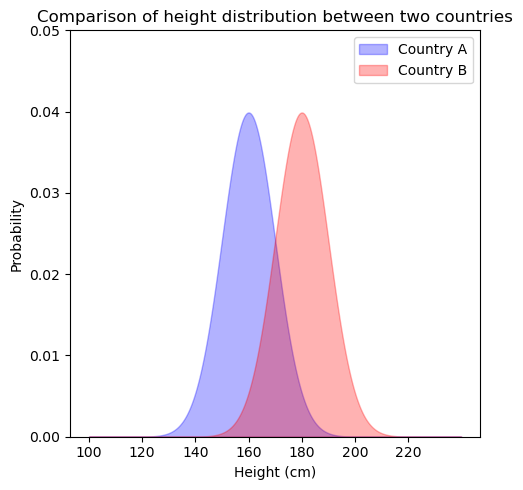

In [12]:
plt.figure(figsize=(5, 5))

# possible heights
heights = np.linspace(100, 240, 1000)

# Country A
country_A_mean_height = 160 # cm
country_A_std_height = 10 # cm

# Country B
country_B_mean_height = 180 # cm
country_B_std_height = 10 # cm

# probability density function
pdf_country_A = stats.norm.pdf(heights, country_A_mean_height, country_A_std_height)
pdf_country_B = stats.norm.pdf(heights, country_B_mean_height, country_B_std_height)

# plot the probability density function with filled area
plt.fill_between(heights, pdf_country_A, color='blue', alpha=0.3, label='Country A')
plt.fill_between(heights, pdf_country_B, color='red', alpha=0.3, label='Country B')
plt.title('Comparison of height distribution between two countries')

# set labels
plt.xlabel('Height (cm)')
plt.ylabel('Probability')

# set ticks
plt.xticks(np.arange(100, 240, 20))

# set limits
plt.ylim(0, 0.05)

plt.legend()
plt.tight_layout()
plt.show()

We see intuitively that the distribution of the height of the citizens of ***Country A*** is shifted to the left compared to the distribution of the height of the citizens of ***Country B***. <br>

The type of distribution is the same for both countries, i.e. it is a normal distribution. However, the parameters of the distribution are different. <br>

Probability theory provides a measure that allows to quantify the difference between two distributions. This ***measure*** is called the ***Kullback-Leibler Divergence***. <br>

This will be the topic of this notebook. <br>

### Mathematics of KL Divergence

The Kullback-Leibler Divergence is defined as follows for continuous distributions:<br>

$$
\begin{align*}
D_{KL}(p||q) &= \int_{-\infty}^{\infty} p(x) \log \frac{p(x)}{q(x)} dx \\
&= \int_{-\infty}^{\infty} p(x) \log p(x) dx - \int_{-\infty}^{\infty} p(x) \log q(x) dx
\end{align*}
$$

and for discrete distributions:<br>

$$
\begin{align*}
D_{KL}(p||q) &= \sum_{x} p(x) \log \frac{p(x)}{q(x)} \\
&= \sum_{x} p(x) \log p(x) - \sum_{x} p(x) \log q(x)
\end{align*}
$$

where $p$ and $q$ are different probability distributions. <br>

***IMPORTANT***:<br>
- The KL divergence is not a distance measure. It is not symmetric, i.e. $D_{KL}(p||q) \neq D_{KL}(q||p)$. <br>
- And it does not fullfil triangle inequality, i.e. $D_{KL}(p||q) + D_{KL}(q||r) \geq D_{KL}(p||r)$. <br>

For simple distributions the KL divergence can be calculated analytically. Like in our case where we have two normal distributions. <br>

It does not hurt to do it by hand one time, so lets do it. <br>

The probability distributions have the form: <br>

$$
\begin{align*}
p(x) &= \frac{1}{\sqrt{2\pi}\sigma_{A}} \exp{-\frac{(x_A - x)^2}{2 \sigma_{A}^2}}\\
q(x) &= \frac{1}{\sqrt{2\pi}\sigma_{B}} \exp{-\frac{(x_B - x)^2}{2 \sigma_{B}^2}}\\
\end{align*}
$$

The KL divergence therefore is:<br>

$$
\begin{align*}
D_{KL}(p||q) &= \int_{-\infty}^{\infty} p(x) \log \frac{p(x)}{q(x)} dx \\
&= \int_{-\infty}^{\infty} dx \frac{1}{\sqrt{2\pi}\sigma_{A}} \exp{-\frac{(x_A - x)^2}{2 \sigma_{A}}} \log{\frac{\frac{1}{\sqrt{2\pi}\sigma_{A}} \exp{-\frac{(x_A - x)^2}{2 \sigma_{A}^2}}}{\frac{1}{\sqrt{2\pi}\sigma_{B}} \exp{-\frac{(x_B - x)^2}{2 \sigma_{B}^2}}}}\\
&=  \frac{1}{\sqrt{2\pi}\sigma_{A}} \log{\frac{\sigma_{B}}{\sigma_{A}}} \int_{-\infty}^{\infty} dx \exp{-\frac{(x_A - x)^2}{2 \sigma_{A}}} (-\frac{(x_A - x)^2}{2 \sigma_{A}^2} + \frac{(x_B - x)^2}{2 \sigma_{B}^2})\\
&= \dots \\
&= \log{\frac{\sigma_{B}}{\sigma_{A}}} + \frac{\sigma_{A}^2 + (x_A - x_B)^2}{2 \sigma_{B}^2} - \frac{1}{2}
\end{align*}
$$

The exact solution in our case is for $x_A = 1.6$, $x_B = 1.8$, $\sigma_A = \sigma_B = 0.1$:<br>

$$
\begin{align*}
D_{KL}(p||q) &= \log{\frac{0.1}{0.1}} + \frac{0.1^2 + (1.6 - 1.8)^2}{2 \cdot 0.1^2} - \frac{1}{2} \\
&= 0 + \frac{5}{2} - \frac{1}{2} \\
&= 2\\
\end{align*}
$$

We have now an exact value fort the KL divergence. <br>

When the two distributions are the same, i.e. $p(x) = q(x)$, then the KL divergence is zero. <br>

### Visualising the KL Divergence with Varying Mean Values

The code is shown below. One probability distribution is fixed $p(x)$ and the other probability distribution $q(x)$ is varied. <br>

Lets keep it in the population height example. <br>

/var/folders/0m/2px4t5jj7zb9t33jz6srvdb00000gn/T/ipykernel_24223/1748566257.py:81: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join(folder, 'KL_divergence_{}.png'.format(mean_height))))


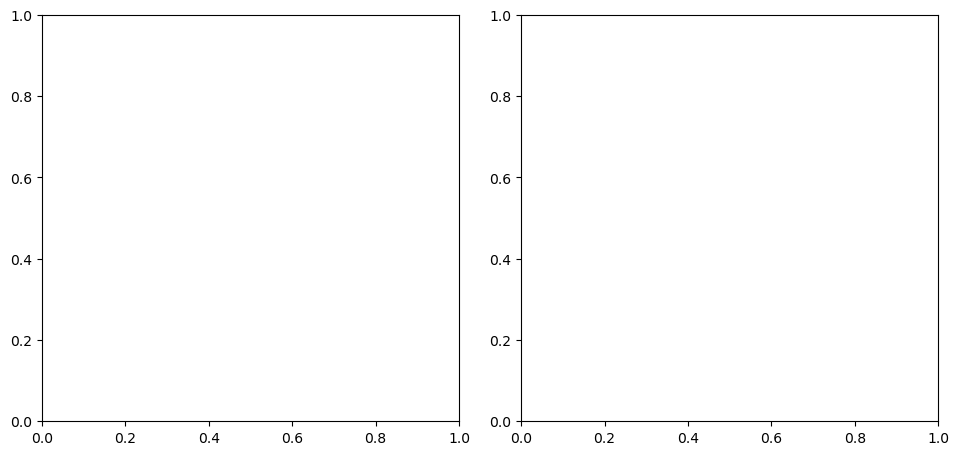

In [24]:
import imageio
import os

# images next to each other
fig, axes = plt.subplots(figsize=(10, 5),
                            ncols=2,
                            nrows=1)

# folder where temporary images are saved
folder = 'images'

# we vary from 140 to 200 cm
mean_heights = np.arange(140, 200, 1)

# standard deviation is fixed
std_height = 10

# possible heights
heights = np.linspace(100, 240, 1000)

# probability density function
pdf_country_A = stats.norm.pdf(heights, country_A_mean_height, country_A_std_height)

kl_divergences = []
h = []

for mean_height in mean_heights:
    # probability density function
    pdf_country_B = stats.norm.pdf(heights, mean_height, std_height)

    # plot the probability density function with filled area
    axes[0].fill_between(heights, pdf_country_A, color='blue', alpha=0.3, label='Country A')
    axes[0].fill_between(heights, pdf_country_B, color='red', alpha=0.3, label='Country B')
    axes[0].set_title('Height distribution of two countries')

    # set labels
    axes[0].set_xlabel('Height (cm)')
    axes[0].set_ylabel('Probability')

    # set ticks
    axes[0].set_xticks(np.arange(100, 240, 20))

    # set limits
    axes[0].set_ylim(0, 0.05)

    # KL divergence
    kl_divergence = stats.entropy(pdf_country_A, pdf_country_B)
    
    # plot the kulback-leibler divergence dependent on the mean height
    kl_divergences.append(kl_divergence)
    h.append(mean_height)
    axes[1].scatter(h, kl_divergences, color='black')
    axes[1].set_title('KL Divergence: {:.2f}'.format(kl_divergence))

    # set labels
    axes[1].set_xlabel('Mean height (cm)')
    axes[1].set_ylabel('KL divergence')

    # set ticks
    axes[1].set_xticks(np.arange(100, 240, 20))

    # set limits
    axes[1].set_ylim(0, 10)

    fig.tight_layout()
    

    # save the figure
    plt.savefig(os.path.join(folder, 'KL_divergence_{}.png'.format(mean_height)))

    # clear the axes
    axes[0].cla()
    axes[1].cla()

    plt.cla()


# create a gif
images = []
for mean_height in mean_heights:
    images.append(imageio.imread(os.path.join(folder, 'KL_divergence_{}.png'.format(mean_height))))

imageio.mimwrite('KL_divergence.gif', images, fps=10)

# remove the temporary images
for mean_height in mean_heights:
    os.remove(os.path.join(folder, 'KL_divergence_{}.png'.format(mean_height)))


The evolution of the KL divergence is shown in the GIF below. <br>

From the mathematical point of view the shape of the KL divergence is not suprisingly a ***Parabola***. <br>

![](images/KL_divergence.gif)

### Visualising the KL Divergence in Mulitple Parameter Dimensions

Gaussian probability distributions are defined by two parameters, the mean value and the standard deviation. <br>

In the previous example we have varied the mean value of the probability distribution. Now we will vary both parameters of the $q(x)$ distribution and look at the KL divergence in a 3D plot. <br>


For simplicity we will take the analytical solution of the KL divergence for two Gaussian distributions. <br>

$$
\begin{align*}
D_{KL}(p||q) &= \log{\frac{\sigma_{B}}{\sigma_{A}}} + \frac{\sigma_{A}^2 + (x_A - x_B)^2}{2 \sigma_{B}^2} - \frac{1}{2}
\end{align*}
$$

This should have a minimum at $x_A = x_B$ and $\sigma_A = \sigma_B$. <br>

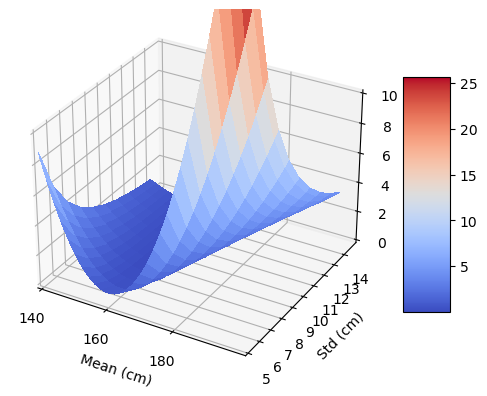

In [23]:
# import necessary tools for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def analytic_KL(mean_A, std_A, mean_B, std_B) -> float:
    """
    Analytic KL divergence between two normal distributions.

    Args:
        mean_A (float): Mean of the first normal distribution.
        std_A (float): Standard deviation of the first normal distribution.
        mean_B (float): Mean of the second normal distribution.
        std_B (float): Standard deviation of the second normal distribution.

    Returns:
        float: KL divergence between the two normal distributions.
    """
    return np.log(std_B / std_A) + (std_A**2 + (mean_A - mean_B)**2) / (2 * std_B**2) - 1 / 2




# Country A
country_A_mean_height = 160 # cm
country_A_std_height = 10 # cm

# Country B
# we vary from 140 to 200 cm
mean_heights = np.arange(140, 200, 1)
# std is varied as well
std_height = np.arange(5, 15, 1)

# plot the KL divergence for different mean heights and standard deviations in 3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# create a meshgrid
mean_heights, std_height = np.meshgrid(mean_heights, std_height)

# calculate the KL divergence for each combination of mean height and standard deviation
kl_divergences = analytic_KL(country_A_mean_height, country_A_std_height, mean_heights, std_height)

# plot the KL divergence
surf = ax.plot_surface(mean_heights, std_height, kl_divergences, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# set labels
ax.set_xlabel('Mean (cm)')
ax.set_ylabel('Std (cm)')
ax.set_zlabel('KL divergence')

# set ticks
ax.set_xticks(np.arange(140, 200, 20))
ax.set_yticks(np.arange(5, 15, 1))

# set limits
ax.set_xlim(140, 200)
ax.set_ylim(5, 15)
ax.set_zlim(0, 10)

# add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()

plt.show()

Now we have a beautiful 3D plot of the KL divergence for two Gaussian distributions. <br>

In our case, the KL divergence was analytically determined. In general, probability distributions can get arbitrarily complex and the KL divergence can only be calculated numerically. <br>

Determining it numerically is the default way for all machine learning problems. <br>

It is essential in machine learning because all generative models are trying to learn a probability distribution over some data. The learned probability distribution is compared to the true probability distribution with the ***KL divergence***. <br>

### Additional Information

The KL divergence is also called ***relative entropy***. <br>

When splitting up the discrete KL divergence into two parts, we get the ***cross entropy*** and the ***entropy***. <br>

$$
\begin{align*}
D_{KL}(p||q) &= \sum_{x} p(x) \log \frac{p(x)}{q(x)} \\
&= \sum_{x} p(x) \log p(x) - \sum_{x} p(x) \log q(x) \\
&= - \sum_{x} p(x) \log q(x) + \sum_{x} p(x) \log p(x) \\
&= H(p,q) - H(p) \\
\end{align*}
$$

The cross entropy is defined as: <br>

$$
\begin{align*}
H(p,q) &= - \sum_{x} p(x) \log q(x) \\
\end{align*}
$$

The entropy is defined as: <br>

$$
\begin{align*}
H(p) &= - \sum_{x} p(x) \log p(x) \\
\end{align*}
$$

The cross entropy is the expected value of the negative log likelihood of the probability distribution $q(x)$, where the probability distribution $p(x)$ is the true distribution. <br>

The entropy is the expected value of the negative log likelihood of the probability distribution $p(x)$. <br>

The cross entropy is always greater or equal to the entropy. <br>

The KL divergence is connected to many more concepts in statistics that would be too much to cover here. <br>

***I hope this was enlightening and enjoyable to read for you.*** <br>